# 卷积神经网络

## 项目：为小狗识别应用编写算法 

---

在此 notebook 中，我们已经为你提供一些模板代码，要成功完成此项目，你需要实现其他功能。除此之外，不需要修改所提供的代码。标题中以**（实现）**开头的部分表明你必须在下面的代码块中提供其他功能。我们会在每个部分提供说明，并在以“TODO”开头的代码块中提供实现细节。请仔细阅读说明。 

> **注意**：完成所有代码实现后，最后需要将 iPython Notebook 导出为 HTML 文档。在将 notebook 导出为 HTML 前，请运行所有代码单元格，使审阅者能够查看最终实现和输出结果。然后导出 notebook，方法是：使用顶部的菜单并依次转到**文件 -> 下载为 -> HTML (.html)**。提交内容应该同时包含此 notebook 和完成的文档。

除了实现代码之外，还需要回答与项目和代码实现相关的问题。请仔细阅读每个问题，并在**答案：**下方的文本框中填写答案。我们将根据每个问题的答案以及实现代码评估你提交的项目。

>**注意：**可以通过 **Shift + Enter** 键盘快捷键执行代码和标记单元格，并且可以通过双击单元格进入编辑模式，编辑标记单元格。

审阅标准还包含可选的“锦上添花”建议，可以指导你在满足最低要求的基础上改进项目。如果你打算采纳这些建议，则应该在此 Jupyter notebook 中添加代码。



---
### 为何要完成这道练习 

在此 notebook 中，你将开发一种可用于移动应用或网络应用的算法。最终你的代码将能够将任何用户提供的图像作为输入。如果从图像中检测出小狗，该算法将大致识别出小狗品种。如果检测出人脸，该算法将大致识别出最相似的小狗品种。下图显示了最终项目的潜在示例输出（但是我们希望每个学员的算法行为都不一样。）。 

![Sample Dog Output](images/sample_dog_output.png)

在此实际应用中，你需要将一系列模型整合到一起并执行不同的任务；例如，检测图中人脸的算法与推理小狗品种的 CNN 将不一样。有很多地方都可能会出错，没有什么完美的算法。即使你的答案不完美，也可以创造有趣的用户体验。

### 项目规划

我们将此 notebook 分成了几个独立的步骤。你可以通过以下链接浏览此 notebook。

* [第 0 步](#step0)：导入数据集
* [第 1 步](#step1)：检测人脸
* [第 2 步](#step2)：检测小狗
* [第 3 步](#step3)：（从头开始）创建分类小狗品种的 CNN
* [第 4 步](#step4)：（使用迁移学习）创建分类小狗品种的 CNN
* [第 5 步](#step5)：编写算法
* [第 6 步](#step6)：测试算法

---
<a id='step0'></a>
## 第 0 步：导入数据集

首先下载人脸和小狗数据集：
* 下载[小狗数据集](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip)。解压文件并将其放入此项目的主目录中，位置为 `/dog_images`。 

* 下载[人脸数据集](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip)。解压文件并将其放入此项目的主目录中，位置为 `/lfw`。  

*注意如果你使用的是 Windows 设备，建议使用 [7zip](http://www.7-zip.org/) 解压文件。*

在下面的代码单元格中将人脸 (LFW) 数据集和小狗数据集的文件路径保存到 NumPy 数组 `human_files` 和 `dog_files` 中。

In [2]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/home/ubuntu/Datum/datum/DeepLearning/lfw/*/*"))
dog_files = np.array(glob("/home/ubuntu/Datum/datum/DeepLearning/dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## 第 1 步：检测人脸

在此部分，我们使用 OpenCV 的[哈儿特征级联分类器](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html)检测图像中的人脸。  

OpenCV 提供了很多预训练的人脸检测器，它们以 XML 文件的形式存储在 [github](https://github.com/opencv/opencv/tree/master/data/haarcascades) 上。我们下载了其中一个检测器并存储在 `haarcascades` 目录中。在下个代码单元格中，我们将演示如何使用此检测器从样本图像中检测人脸。

Number of faces detected: 1


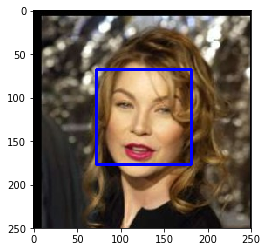

In [3]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

在使用任何人脸检测器之前，标准做法是将图像转换为灰阶图像。`detectMultiScale` 函数会执行存储在 `face_cascade` 中的分类器并将灰阶图像当做参数。  

在上述代码中，`faces` 是一个包含检测到的人脸的 numpy 数组，其中每行对应一张检测到的人脸。检测到的每张人脸都是一个一维数组，其中有四个条目，分别指定了检测到的人脸的边界框。数组中的前两个条目（在上述代码中提取为 `x` 和`y`）指定了左上角边界框的水平和垂直位置。数组中的后两个条目（提取为 `w` 和 `h`）指定了边界框的宽和高。

### 编写人脸检测器

我们可以编写一个函数，如果在图像中检测到人脸，该函数将返回 `True`，否则返回 `False`。此函数称为 `face_detector`，参数为图像的字符串文件路径，并出现在以下代码块中。

In [4]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### （实现）评估人脸检测器

__问题 1：__使用以下代码单元格测试 `face_detector` 函数的性能。  
- 对于 `human_files` 中的前100 张图像，有多少图像检测到了人脸？  
- 对于 `dog_files` 中的前100 张图像，有多少图像检测到了人脸？ 

理想情况下，我们希望所有人脸图像都能检测到人脸，所有小狗图像都不能检测到人脸。我们的算法不能满足此目标，但是依然达到了可接受的水平。我们针对每个数据集的前 100 张图像提取出文件路径，并将它们存储在 numpy 数组 `human_files_short` 和 `dog_files_short` 中。

__答案：__ 
（请在此单元格中填写结果和/或百分比）

In [5]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#    
## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_acc = 0
dog_acc = 0
for human, dog in zip(human_files_short, dog_files_short):
    if face_detector(human):
        human_acc+=1
    if face_detector(dog):
        dog_acc+=1

print("human accuracy {} dog accuracy {}".format(human_acc/100.0, 
                                                dog_acc/100.0))

human accuracy 0.97 dog accuracy 0.15


建议在算法中使用 OpenCV 的人脸检测器来检测人脸图像，但是你也可以尝试其他方法，尤其是利用深度学习的方法:)。请在以下代码单元格中设计并测试你的人脸检测算法。如果你打算完成此_可选_任务，请报告 `human_files_short` 和 `dog_files_short` 的效果。

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## 第 2 步：检测小狗

在此部分，我们使用[预训练的模型](http://pytorch.org/docs/master/torchvision/models.html)检测图像中的小狗。  

### 获取预训练的 VGG-16 模型

以下代码单元格会下载 VGG-16 模型以及在 [ImageNet](http://www.image-net.org/) 上训练过的权重，ImageNet 是一个非常热门的数据集，可以用于图像分类和其他视觉任务。ImageNet 包含 1000 万以上的 URL，每个都链接到包含某个对象的图像，这些对象分成了 [1000 个类别](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a)。

In [ ]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

如果给定一张图像，此预训练的 VGG-16 模型能够针对图像中的对象返回预测结果（属于 ImageNet 中的 1000 个潜在类别之一）。

### （实现）使用预训练的模型做出预测

在下个代码单元格中，你将编写一个函数，它将图像路径（例如 `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`）当做输入，并返回预训练 VGG-16 模型预测的 ImageNet 类别对应的索引。输出应该始终是在 0 - 999（含）之间的整数。

在编写该函数之前，请阅读此 [PyTorch 文档](http://pytorch.org/docs/stable/torchvision/models.html)，了解如何针对预训练的模型预处理张量。

In [ ]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    return None # predicted class index

### （实现）编写小狗检测器

查看该[字典](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a)后，你将发现：小狗对应的类别按顺序排列，对应的键是 151-268（含），包含从 `'Chihuahua'` 到 `'Mexican hairless'` 的所有类别。因此，要检查预训练的 VGG-16 模型是否预测某个图像包含小狗，我们只需检查预训练模型预测的索引是否在 151 - 268（含）之间。

请根据这些信息完成下面的 `dog_detector` 函数，如果从图像中检测出小狗，它将返回 `True`（否则返回 `False`）。

In [ ]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    
    return None # true/false

### （实现）评估小狗检测器

__问题 2：__在以下代码单元格中测试 `dog_detector` 的效果。  
- 对于 `human_files_short` 中的图像，有多少图像检测到了小狗？  
- 对于 `dog_files_short` 中的图像，有多少图像检测到了小狗？

__答案：__

In [ ]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.


建议在算法中使用 VGG-16 检测小狗图像，但是你也可以尝试其他预训练的网络（例如 [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3)、[ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3) 等）。请在以下代码单元格中测试其他预训练的 PyTorch 模型。如果你打算完成此_可选_任务，请报告 `human_files_short` 和 `dog_files_short` 的效果。

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## 第 3 步：（从头开始）创建分类小狗品种的 CNN

创建好从图像中检测人脸和小狗的函数后，我们需要预测图像中的小狗品种。在这一步，你需要创建一个分类小狗品种的 CNN。你必须从头创建一个 CNN（因此暂时不能使用迁移学习。），并且测试准确率必须至少达到 10%。在此 notebook 的第 4 步，你将使用迁移学习创建 CNN，并且能够获得很高的准确率。

预测图中小狗的品种是一项非常难的挑战。说实话，即使是我们人类，也很难区分布列塔尼猎犬和威尔斯激飞猎犬。  

布列塔尼猎犬 | 威尔斯激飞猎犬
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

还有很多其他相似的狗品种（例如卷毛寻回犬和美国水猎犬）。  

卷毛寻回犬 | 美国水猎犬
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


同理，拉布拉多有黄色、巧克力色和黑色品种。基于视觉的算法需要克服这种同一类别差异很大的问题，并决定如何将所有这些不同肤色的小狗分类为相同的品种。  

黄色拉布拉多 | 巧克力色拉布拉多 | 黑色拉布拉多
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

随机猜测的效果很差：除了类别数量不太平衡之外，随机猜测的正确概率约为 1/133，准确率不到 1%。  

在深度学习领域，实践比理论知识靠谱得到。请尝试多种不同的架构，并相信你的直觉。希望你可以从学习中获得乐趣！

### （实现）为小狗数据集指定数据加载器

在以下代码单元格中编写三个独立的[数据加载器](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)，用于训练、验证和测试小狗图像数据集（分别位于 `dog_images/train`、`dog_images/valid` 和 `dog_images/test` 下）。[此自定义数据集文档](http://pytorch.org/docs/stable/torchvision/datasets.html)或许对你有帮助。如果你想增强训练和/或验证数据，请参阅各种[转换方法](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)！

In [ ]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes


**问题 3：**描述你所选的数据预处理流程。 
- 你是如何调整图像大小的（裁剪、拉伸等）？你选择的输入张量大小是多少，为何？
- 你是否决定增强数据集？如果是，如何增强（平移、翻转、旋转等）？如果否，理由是？


**答案**：

### （实现）模型架构

创建分类小狗品种的 CNN。使用以下代码单元格中的模板。

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
    
    def forward(self, x):
        ## Define forward behavior
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__问题 4：__列出获得最终 CNN 结构的步骤以及每步的推理过程。  

__答案：__ 

### （实现）指定损失函数和优化器

在下个代码单元格中指定[损失函数](http://pytorch.org/docs/stable/nn.html#loss-functions)和[优化器](http://pytorch.org/docs/stable/optim.html)。在下面将所选的损失函数另存为 `criterion_scratch`，并将优化器另存为 `optimizer_scratch`。

In [ ]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = None

### TODO: select optimizer
optimizer_scratch = None

### （实现）训练和验证模型

在以下代码单元格中训练和验证模型。[将最终模型参数](http://pytorch.org/docs/master/notes/serialization.html)保存到以下文件路径：`'model_scratch.pt'`。

In [ ]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
            
    # return trained model
    return model


# train the model
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### （实现）测试模型

在小狗图像测试数据集上尝试模型。在以下代码单元格中计算并输出测试损失和准确率。确保测试准确率高于 10%。

In [ ]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

---
<a id='step4'></a>
## 第 4 步：（使用迁移学习）创建分类小狗品种的 CNN

现在你将使用迁移学习创建能够识别图中小狗品种的 CNN。你的 CNN 必须在测试集上至少达到 60% 的准确率。

### （实现）为小狗数据集指定数据加载器

在以下代码单元格中编写三个独立的[数据加载器](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader)，用于训练、验证和测试小狗图像数据集（分别位于 `dogImages/train`、`dogImages/valid` 和 `dogImages/test` 下）。 

**你也可以使用在从头开始创建 CNN 这一步时创建的同一数据加载器**。

In [ ]:
## TODO: Specify data loaders


### （实现）模型架构

使用迁移学习创建分类小狗品种的 CNN。在以下代码单元格中填写代码并将初始化的模型另存为变量 `model_transfer`。

In [ ]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 


if use_cuda:
    model_transfer = model_transfer.cuda()

__问题 5：__列出获得最终 CNN 结构的步骤以及每步的推理过程。解释为何该结构适合解决手头的问题。

__答案：__ 


### （实现）指定损失函数和优化器

在下个代码单元格中指定[损失函数](http://pytorch.org/docs/master/nn.html#loss-functions)和[优化器](http://pytorch.org/docs/master/optim.html)。在下面将所选的损失函数另存为 `criterion_transfer`，并将优化器另存为 `optimizer_transfer`。

In [ ]:
criterion_transfer = None
optimizer_transfer = None

### （实现）训练和验证模型。

在以下代码单元格中训练和验证模型。[将最终模型参数](http://pytorch.org/docs/master/notes/serialization.html)保存到以下文件路径：`'model_transfer.pt'`。

In [ ]:
# train the model
model_transfer = # train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### （实现）测试模型

在小狗图像测试数据集上尝试模型。在以下代码单元格中计算并输出测试损失和准确率。确保测试准确率高于 60%。

In [ ]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

### （实现）使用模型预测小狗品种

编写一个函数，它会将图像路径作为输入，并返回模型预测的小狗品种（`Affenpinscher`、`Afghan hound` 等）。

In [ ]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    return None

---
<a id='step5'></a>
## 第 5 步：编写算法

编写一个算法，它会将图像的文件路径作为输入，并首先判断图像中是否包含人脸、小狗，或二者都不含。然后，
- 如果在图像中检测到了__小狗__，则返回预测的品种。
- 如果在图像中检测到了__人脸__，则返回相似的小狗品种。
- 如果二者都没检测到，则输出错误消息。

你可以自己编写从图像中检测人脸和小狗的函数，当然也可以使用上面开发的 `face_detector` 和 `human_detector` 函数。你必须使用在第 4 步创建的 CNN 预测小狗品种。  

下面提供了一些示例算法输出，但是你也可以自己设计用户体验。

![Sample Human Output](images/sample_human_output.png)


### （实现）编写算法

In [ ]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    


---
<a id='step6'></a>
## 第 6 步：测试算法

在此部分测试新算法啦。算法认为看起来像哪种小狗？如果你有一只狗，算法能准确预测出小狗的品种吗？如果你有一只猫，算法会错误地认为这只猫是小狗吗？

### （实现）在样本图像上测试算法。

至少在计算机上用 6 张图像测试你的算法。你可以使用任何图像。至少测试两张人脸图像和两张小狗图像。  

__问题 6：__结果比你预期的要好吗 :)?还是更糟糕 :(？请对你的算法提出至少三个值得改进的地方。

__答案：__（三个值得改进的地方）


```python
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)
```